In [1]:
# load libraries
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageOps

from image_generator import TextImageGenerator

# Loading fonts

On mac, you may need to explicitly add the fonts/ directory to your fontconfig conf file to be able to use font files in unexpected locations.  
Fontconfig should likely be installed already. If not, I recommend installing it with homebrew:
`brew install fontconfig`

It will place a default conf file in the following path:
`/usr/local/etc/fonts/fonts.conf`

What you'd need to do is add the fonts/ dir in the `<!-- Font directory list -->` section up top, like so:
`    <dir>/Users/esalesky/minimal_renderer/fonts</dir>`

You will know you're successful if there is no fontconfig error message when loading the next cell, and if rendering shows the expected font

# Load renderer

In [2]:
# -- default image generator -- 
pixels_per_patch = 24 # this controls the number of pixels tall your line will be. you may be able to get away with 16 depending on the characters/diacritics. it also controls patch width, but, that should be irrelevant here
max_seq_length = 10   # max seq length: this is the number of pixels_per_patch patches that fit in a sentence image. It will truncate longer sentences. I'd train with a typical MT length, but, 10 is nice for visualization below.
font_size = 10

# whether or not you want strided overlapping patches. settings this equal to patch width renders text continuously
stride = pixels_per_patch

# fonts: the specified font file will be used, with the fonts in ./fonts/fallback_dir used as backoffs should the specified font not cover all unicode chars in the input string
# dpi: note that you would have to increase the pixel_per_patch size to increase dpi, because it will need more pixel space to increase resolution. I typically do not change this.

image_generator = TextImageGenerator(
    font_size=font_size,
    pixels_per_patch=pixels_per_patch,
    stride=stride,
    dpi=120,
    max_seq_length=max_seq_length,
    font_file='./fonts/GoNotoCurrent.ttf',
    rgb=False
)

# Examples

In [3]:
# -- example sentences -- #
# sentence = "My cat 🐈 loves pancakes 🥞 and my duck 🦆 loves grapes 🍇."
# sentence = 'ख़ ज़ीरा आस्ट्रेलिया के पाल हेनली के  साथ जोड़ी उल्लू शुरू test'
# sentence = 'أَفَاسْتَسْقَيْنَاكُمُوهَا testy test أَفَاسْتَسْقَيْ'
# sentence = "𝔱𝔥𝔦𝔰 𝔦𝔰 𝔞 𝔰𝔢𝔫𝔱𝔢𝔫𝔠𝔢"
# sentence = "𝒃𝒊𝒂 𝑜𝓉𝒽𝑒𝓇 𝐒𝐇𝐀 𝒄𝒓𝒆𝒅𝒊 𝐓𝐎𝐎 🚴🏽🏽 𝗟𝗲𝗮𝗱𝘀 𝐒𝐀𝐓𝐔𝐑𝐃𝐀𝐘𝐒 𝓢𝓸𝓾𝓵 𝐚𝐠𝐫𝐞𝐞"
# sentence = "🧛🏼\u200d♂️"
# sentence = "▁test ▁t est"  # note that I have it set up to strip sentencepiece formatting. to change this, set debpe = False in image_generator.py L391
sentence = '𒁹𒄑𒈿𒂵𒊑𒍝𒋼'

In [4]:
sent_image = image_generator.get_image(sentence)

In [5]:
image = Image.fromarray(sent_image)
display(image)
# image.save('/Users/esalesky/Downloads/example_image.png')

In [6]:
sent_image.shape

(24, 144)

# Visualizing tokens

In [7]:
from typing import Union,List

def show_images(images: List[np.ndarray]) -> None:
    n: int = len(images)
    f = plt.figure(figsize=(20, 5))
    for i in range(n):
        # token figure
        ax = f.add_subplot(1, n, i + 1)
        plt.imshow(images[i],cmap='gray', vmin=0, vmax=255)
        ax.set_xticks([])
        ax.set_yticks([])

    plt.show(block=True)

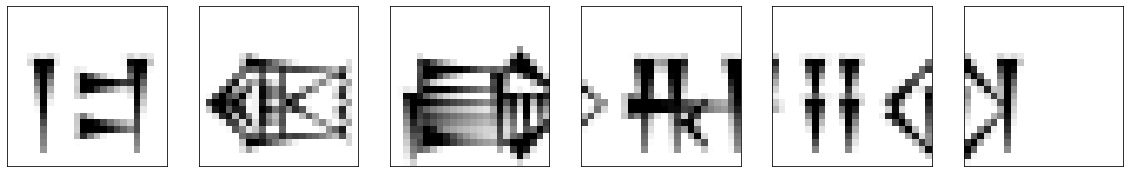

In [8]:
# -- note: get_images returns sliced images, get_image returns single sentence-level image --
x, image_tokens = image_generator.get_images(sentence)
show_images(image_tokens)